In [2]:
"""
2차 중간결과물 발표 코드
1. knn(k- nearest neighbors) 알고리즘을 이용한 cifar-10 데이터셋 image classification
"""
# -*- coding: utf-8 -*-
import numpy as np
import operator
import matplotlib.pyplot as plt
from tensorflow.python.keras._impl.keras.datasets.cifar10 import load_data  #cifar 데이터셋 로드

class knn_classification_model():
    # 클래스 객체 생성과 동시에 cifar 데이터셋에서 training set, test set 저장
    def __init__(self, k, dist):
        (x_train, y_train), (x_test, y_test) = load_data()
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
        self.k = k
        self.dist = dist

    # 데이터에 대해 normalization 0-1 사이로 만들어줌
    def data_preprocessing(self):
        self.x_train = self.x_train.astype('float32')
        self.x_test = self.x_test.astype('float32')
        self.x_train /= 255
        self.x_test /= 255

    # L1 distance (차이의 절댓값의 합) 구하는 함수
    def compute_l1_mat(self, x1, x2):
        diff = np.abs(x1 - x2)
        rs_diff = diff.sum(axis=1)
        return rs_diff

    # L2 distance (차이의 제곱합의 제곱근) 구하는 함수
    def compute_l2_mat(self, x1, x2):
        sq = np.square(x1- x2)
        sum_sq = sq.sum(axis=1)
        root = np.sqrt(sum_sq)
        return root

    # plt 이용해서 이미지 출력하고 true label과 predicted label 출력 함수
    def show_img_label(self, input_x, true, pred):
        plt.imshow(input_x)
        plt.show()
        print("true label:", self.class_name[true], " / predicted label:", self.class_name[pred])

    # 100개 test set에 대해 knn을 이용한 이미지 분류 수행
    # 추가: 랜덤으로 하나 뽑은 이미지 보여주기
    def predict(self):
        self.data_preprocessing()
        acc_sum = 0
        cor_cnt = 0
        uncor_cnt = 0
        for idx in range(100):
            result_label = []
            result_label_dict = {}
            validating_x = self.x_test[idx]
            self.x_train = np.reshape(self.x_train, [50000, 32*32*3]) #knn 비교를 위해 reshape
            validating_x = np.reshape(validating_x, [32*32*3])        #knn 비교를 위해 reshape
            validating_x = np.tile(validating_x, (self.x_train.shape[0], 1)) #tile연산으로 벡터 퍼트리기

            if self.dist == 1:
                # L1 distance 계산
                choice_str = "L1"
                dis_mat = self.compute_l1_mat(self.x_train, validating_x)
            elif self.dist == 2:
                # L2 distance 계산
                choice_str = "L2"
                dis_mat = self.compute_l2_mat(self.x_train, validating_x)

            # 오름차순 정렬후 idx만 배열에 저장
            sort_dist_idx = dis_mat.argsort()

            # knn 알고리즘에 의해 예측된 최상위 k개의 label를 리스트에 저장
            for i in range(self.k):
                result_label.append(self.y_train[sort_dist_idx[i]][0])

            # '예측 label : 개수'의 형태로 담는 딕셔너리
            for label in result_label:
                try:
                    result_label_dict[label] += 1
                except:
                    result_label_dict[label] = 1

            # 딕셔너리에서 value인 개수로 정렬 후 가장 앞의 원소(개수가 가장 많은 label) 가져오기
            result_label_dict = sorted(result_label_dict.items(), key=operator.itemgetter(1))
            result_label_dict.reverse()
            predicted = result_label_dict[0][0] #k개의 예측 label중 가장 많은 수를 차지한 label
            true = self.y_test[idx][0]

            if predicted == true:
                acc_sum += 1
                cor_cnt += 1
                if cor_cnt < 5 :
                    # 이미지 보여주고 label 출력
                    self.show_img_label(self.x_test[idx], true, predicted)
            else:
                uncor_cnt += 1
                if uncor_cnt < 5:
                    # 이미지 보여주고 label 출력
                    self.show_img_label(self.x_test[idx], true, predicted)


        # accuracy 출력
        print("Accuracy of " , choice_str, " KNN algorithm with k=", self.k, ":", acc_sum/float(100))

C:\Users\young\AppData\Roaming\Python\Python35\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


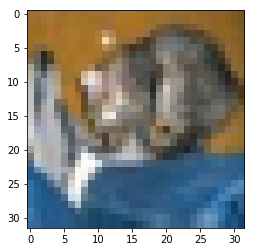

true label: cat  / predicted label: deer


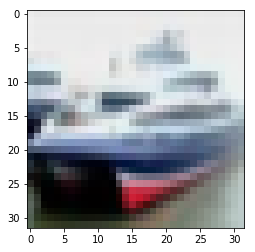

true label: ship  / predicted label: ship


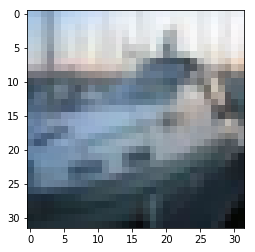

true label: ship  / predicted label: ship


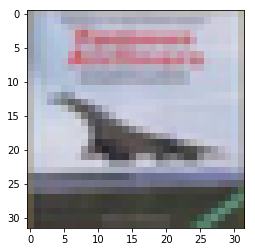

true label: airplane  / predicted label: airplane


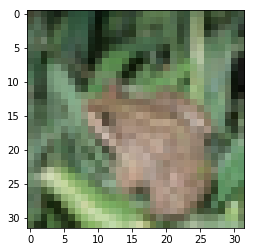

true label: frog  / predicted label: deer


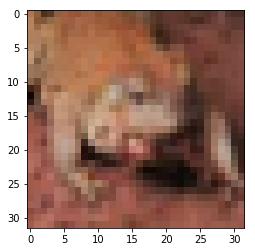

true label: frog  / predicted label: frog


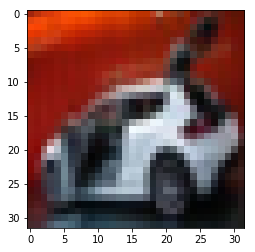

true label: automobile  / predicted label: frog


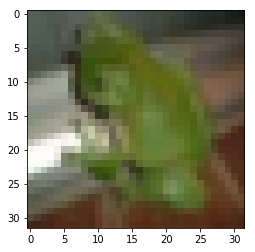

true label: frog  / predicted label: deer
Accuracy of  L1  KNN algorithm with k= 7 : 0.37


In [3]:
m1 = knn_classification_model(k=7, dist=1)
m1.predict()

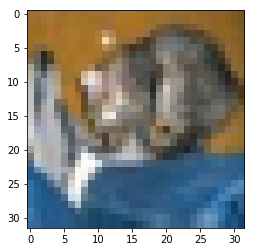

true label: cat  / predicted label: bird


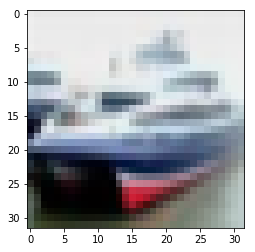

true label: ship  / predicted label: ship


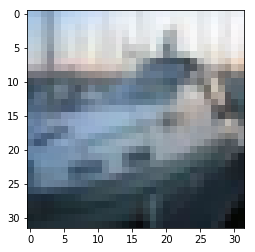

true label: ship  / predicted label: ship


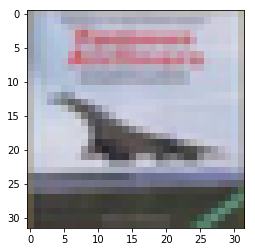

true label: airplane  / predicted label: ship


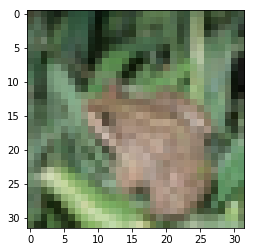

true label: frog  / predicted label: deer


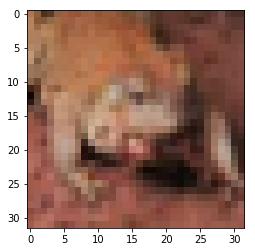

true label: frog  / predicted label: frog


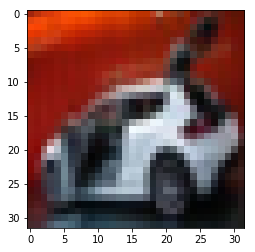

true label: automobile  / predicted label: frog


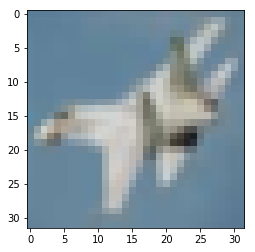

true label: airplane  / predicted label: airplane
Accuracy of  L2  KNN algorithm with k= 7 : 0.34


In [4]:
m2 = knn_classification_model(k=7, dist=2)
m2.predict()

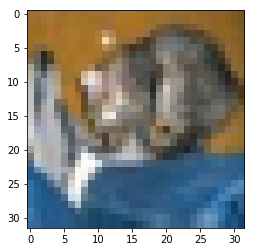

true label: cat  / predicted label: bird


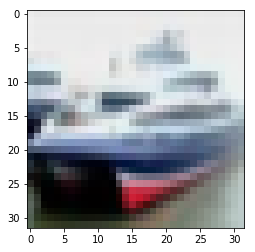

true label: ship  / predicted label: ship


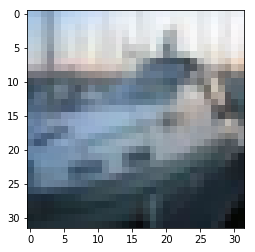

true label: ship  / predicted label: ship


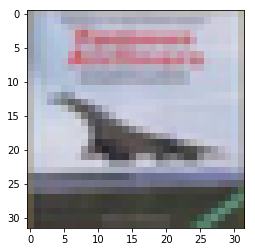

true label: airplane  / predicted label: ship


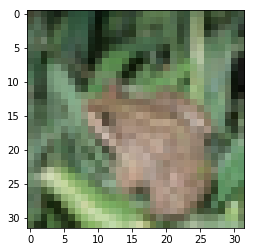

true label: frog  / predicted label: deer


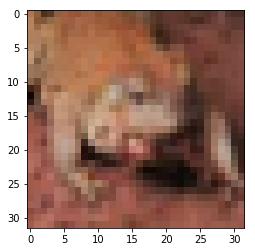

true label: frog  / predicted label: deer


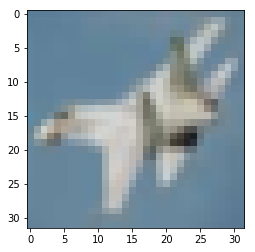

true label: airplane  / predicted label: airplane


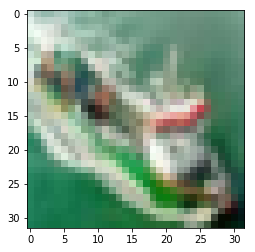

true label: ship  / predicted label: ship
Accuracy of  L1  KNN algorithm with k= 223 : 0.3


In [5]:
m3 = knn_classification_model(k=223, dist=1)
m3.predict()

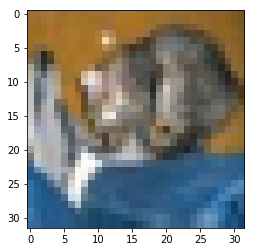

true label: cat  / predicted label: bird


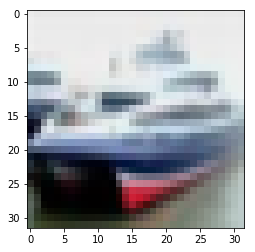

true label: ship  / predicted label: ship


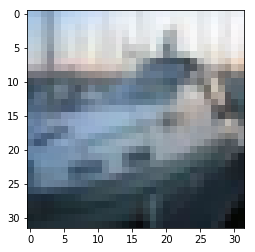

true label: ship  / predicted label: ship


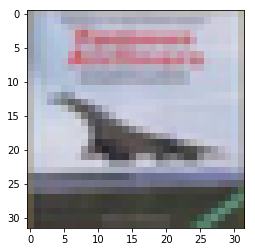

true label: airplane  / predicted label: ship


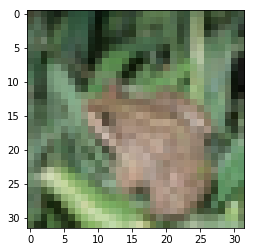

true label: frog  / predicted label: deer


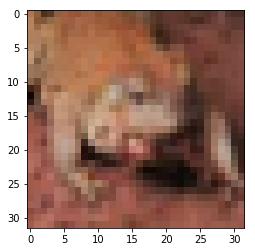

true label: frog  / predicted label: deer


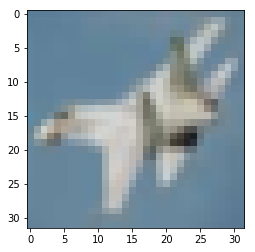

true label: airplane  / predicted label: airplane


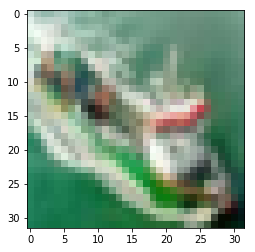

true label: ship  / predicted label: ship
Accuracy of  L2  KNN algorithm with k= 223 : 0.3


In [6]:
m4 = knn_classification_model(k=223, dist=2)
m4.predict()